In [58]:
import json

# Enter your keys/secrets as strings in the following fields
credentials = {}  
credentials['CONSUMER_KEY'] = 'cpBvJKywYgnh7VaAbRxXrPwWg'
credentials['CONSUMER_SECRET'] = 'IxUm2xaHs7cZV1c5W3RwDkR722TbUHqaZ5DbmneHLSR88ncFi6'
credentials['ACCESS_TOKEN'] =  '184462889-cht9XkbjnWh7Ztcnz0ryKWgZQdWx5FFOohtd4yMi'
credentials['ACCESS_SECRET'] = '4SOYC06WuDZovLVAIV2ohecHD8TSgAIOAjaQO6ujcnR0c'

# Save the credentials object to file
with open("twitter_credentials.json", "w") as file:  
    json.dump(credentials, file)

In [59]:
# Import the Twython class
from twython import Twython  
import json

# Load credentials from json file
with open("twitter_credentials.json", "r") as file:  
    creds = json.load(file)

# Instantiate an object
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

# Create our query
query = {'q': '#loksabhaelections2019',  
        'result_type': 'popular',
        'count': 20,
        'lang': 'en',
        }

In [5]:
import pandas as pd

# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}  
for status in python_tweets.search(**query)['statuses']:  
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])

# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)  
df.sort_values(by='favorite_count', inplace=True, ascending=False)  
df.head(30)  

NameError: name 'python_tweets' is not defined

In [61]:
from twython import TwythonStreamer  
import csv

# Filter out unwanted data
def process_tweet(tweet):  
    d = {}
    d['hashtags'] = [hashtag['text'] for hashtag in tweet['entities']['hashtags']]
    d['text'] = tweet['text']
    d['user'] = tweet['user']['screen_name']
    d['user_loc'] = tweet['user']['location']
    return d


# Create a class that inherits TwythonStreamer
class MyStreamer(TwythonStreamer):     

    # Received data
    def on_success(self, data):

        # Only collect tweets in English
        if data['lang'] == 'en':
            tweet_data = process_tweet(data)
            self.save_to_csv(tweet_data)

    # Problem with the API
    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

    # Save each tweet to csv file
    def save_to_csv(self, tweet):
        with open(r'saved_tweets.csv', 'a',encoding="utf-8") as file:
            writer = csv.writer(file)
            writer.writerow(list(tweet.values()))

In [62]:
# Instantiate from our streaming class
stream = MyStreamer(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'],  
                    creds['ACCESS_TOKEN'], creds['ACCESS_SECRET'])
# Start the stream
stream.statuses.filter(track='#loksabhaelections2019')

KeyboardInterrupt: 

In [37]:
import pandas as pd  
tweets = pd.read_csv("saved_tweets.csv",encoding = 'unicode_escape')  
tweets.head()  

,hashtags,text,user,location
0,[],Rahul Gandhi is becoming darling of the Tamil ...,another_patron,India
1,"['LokSabhaElections2019', 'Tamilnadu', 'Assemb...",RT @RKRadhakrishn: In the din of #LokSabhaElec...,SriniLeaks,NaN
2,[],RT @tamizhsudhakar: From periyar leaving congr...,Anandkvp0207,NaN
3,[],RT @ndccmd: Hale and Hearty Welcome our Evergr...,infopreneur,Hong Kong
4,[],"RT @THM_Off: The countdown has started, as we ...",reachhemanth,"Bengaluru, India"


In [38]:
from collections import Counter  
import ast

tweets = pd.read_csv("saved_tweets.csv",encoding = 'unicode_escape')

# Extract hashtags and put them in a list
list_hashtag_strings = [entry for entry in tweets.hashtags]  
list_hashtag_lists = ast.literal_eval(','.join(list_hashtag_strings))  
hashtag_list = [ht.lower() for list_ in list_hashtag_lists for ht in list_]

# Count most common hashtags
counter_hashtags = Counter(hashtag_list)  
counter_hashtags.most_common(20)

[('loksabhaelections2019', 827),
 ('voteforindia', 77),
 ('pulwama', 77),
 ('silchar', 63),
 ('electionswithht', 56),
 ('sanjaynirupamfornorthwest', 49),
 ('tamilnadu', 38),
 ('electioncampaign', 38),
 ('varanasi', 32),
 ('andherieast', 26),
 ('sakshimaharaj', 25),
 ('priyankagandhi', 22),
 ('chowkidaar', 19),
 ('modiagainsaysindia', 18),
 ('bjp', 17),
 ('modihiaayega', 16),
 ('bengaluru', 14),
 ('kanimozhi', 14),
 ('tuticorin', 14),
 ('campaign', 14)]

In [39]:
tweets.head()

,hashtags,text,user,location
0,[],Rahul Gandhi is becoming darling of the Tamil ...,another_patron,India
1,"['LokSabhaElections2019', 'Tamilnadu', 'Assemb...",RT @RKRadhakrishn: In the din of #LokSabhaElec...,SriniLeaks,NaN
2,[],RT @tamizhsudhakar: From periyar leaving congr...,Anandkvp0207,NaN
3,[],RT @ndccmd: Hale and Hearty Welcome our Evergr...,infopreneur,Hong Kong
4,[],"RT @THM_Off: The countdown has started, as we ...",reachhemanth,"Bengaluru, India"


In [40]:
tweets.text.head()

0    Rahul Gandhi is becoming darling of the Tamil ...
1    RT @RKRadhakrishn: In the din of #LokSabhaElec...
2    RT @tamizhsudhakar: From periyar leaving congr...
3    RT @ndccmd: Hale and Hearty Welcome our Evergr...
4    RT @THM_Off: The countdown has started, as we ...
Name: text, dtype: object

In [10]:
tweets['text']=tweets.text.str.lower()

In [52]:
def standardize_text(df, text_field):
    tweets[text_field] = tweets[text_field].str.replace(r"http\S+", "")
    tweets[text_field] = tweets[text_field].str.replace(r"http", "")
    tweets[text_field] = tweets[text_field].str.replace(r"@\S+", "")
    tweets[text_field] = tweets[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    tweets[text_field] = tweets[text_field].str.replace(r"@", "at")
    tweets[text_field] = tweets[text_field].str.replace(r"rt", " ")
    tweets[text_field] = tweets[text_field].str.lower()
    return df

tweets = standardize_text(tweets, "text")

tweets.to_csv("clean_data.csv")
tweets.head()

,hashtags,text,user,location
0,[],rahul gandhi becoming darling tamil masses ros...,another_patron,India
1,"['LokSabhaElections2019', 'Tamilnadu', 'Assemb...",loksabhaelections there been deep dive into ...,SriniLeaks,NaN
2,[],from periyar leaving congress president congre...,Anandkvp0207,NaN
3,[],hale hea y welcome evergreen super star presid...,infopreneur,Hong Kong
4,[],countdown sta ed feel heat this sabha election...,reachhemanth,"Bengaluru, India"


In [41]:
from wordcloud import WordCloud, STOPWORDS

import tweepy
import bs4
import re
import textblob as tx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

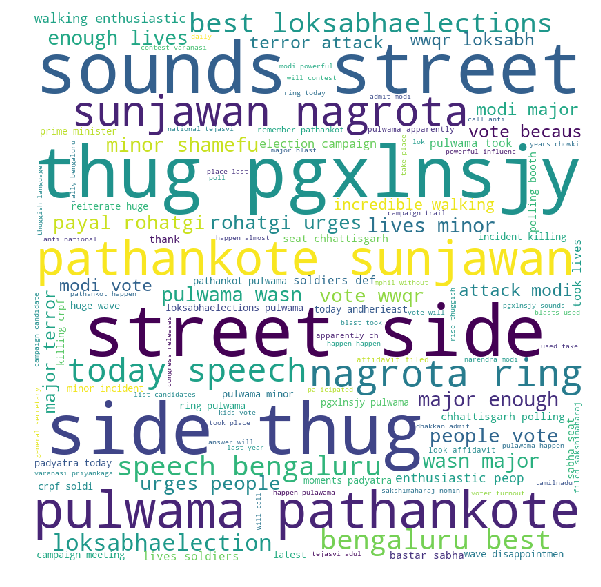

In [53]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(tweets.text.to_string()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [43]:
import numpy as np
import string
import nltk
import warnings 
import re
tweets['text'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")

In [23]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [45]:
tweets['text'] = tweets['text'].str.replace("[^a-zA-Z#]", " ")

In [46]:
tweets['text'] = tweets['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [47]:
tokenized_tweet = tweets['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Rahul, Gandhi, becoming, darling, Tamil, mass...
1    [#LokSabhaElections, there, been, deep, dive, ...
2    [From, periyar, leaving, congress, president, ...
3    [Hale, Hearty, Welcome, Evergreen, Super, Star...
4    [countdown, started, feel, heat, this, Sabha, ...
Name: text, dtype: object

In [28]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [rahul, gandhi, is, becom, darl, of, the, tami...
1    [rt, in, the, din, of, loksabhaelect, there, h...
2    [rt, from, periyar, leav, congress, to, presid...
3    [rt, hale, and, hearti, welcom, our, evergreen...
4    [rt, the, countdown, ha, start, as, we, can, f...
Name: text, dtype: object

In [49]:
tweets.text.head()

0    Rahul Gandhi becoming darling Tamil masses Ros...
1    #LokSabhaElections there been deep dive into #...
2    From periyar leaving congress president congre...
3    Hale Hearty Welcome Evergreen Super Star Presi...
4    countdown started feel heat this Sabha Electio...
Name: text, dtype: object

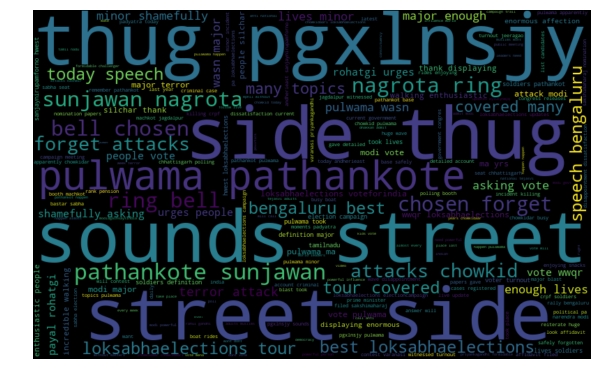

In [54]:
all_words = ' '.join([text for text in tweets['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [59]:

import numpy as np
tweets['Congress']=np.where(tweets['text'].str.contains('congress'),1,0)
tweets['BJP']=np.where(tweets['text'].str.contains('bjp'),1,0)

In [60]:
tweets.head()

,hashtags,text,user,location,Congress,BJP
0,[],rahul gandhi becoming darling tamil masses ros...,another_patron,India,0,0
1,"['LokSabhaElections2019', 'Tamilnadu', 'Assemb...",loksabhaelections there been deep dive into ...,SriniLeaks,NaN,0,0
2,[],from periyar leaving congress president congre...,Anandkvp0207,NaN,1,0
3,[],hale hea y welcome evergreen super star presid...,infopreneur,Hong Kong,0,0
4,[],countdown sta ed feel heat this sabha election...,reachhemanth,"Bengaluru, India",0,0


In [61]:
from nltk import word_tokenize,pos_tag
from nltk.corpus import stopwords

In [63]:
cong = [i for i in word_tokenize(tweets[tweets['Congress']==1].text.to_string()) if i not in set(stopwords.words('english'))]
cong_key = list(filter( lambda x:  len(re.findall(r'^([0-9])+|\.+',x))==0,cong))
cong_adj= [i[0] for i in pos_tag(cong_key) if i[1] in ['JJ','JJR','JJS']]
' '.join(cong_adj)

'congress modi na modi modi modi congress public padyatra general april dict congress general chief slogan chief manish general april loksabhaele electionswithht next electionswithht congress general chief april electionswithht next electionswithht chambal next secr modi scheme nyay general scheme nyay modi general chief april rahul congress general general chief april electio electio electio arrival vid next manifesto congress shah congress congress slow congress congress general chief april ipft suppo slow guna arrival vid sanjayjha loksabh consti modi general chief april leftist modi general chief exclusive wion political list full next congress general april samajh nahi congress general chief opp nonsense congressii public suppo prime congress congress prime prime congress prime congress opp learn prime congress prime congress green congress prime next jhunjhunu full congress full l public suppo narendra congress nyay narendra congress nyay narendra congress nyay congress general a

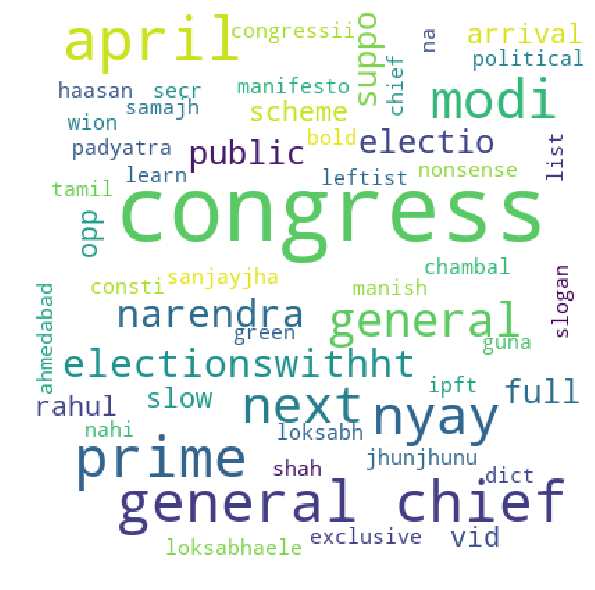

In [64]:

wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(' '.join(cong_adj)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [65]:

bjp = [i for i in word_tokenize(tweets[tweets['BJP']==1].text.to_string()) if i not in set(stopwords.words('english'))]
bjp_key = list(filter( lambda x:  len(re.findall(r'^([0-9])+|\.+',x))==0,bjp))
bjp_adj= [i[0] for i in pos_tag(bjp_key) if i[1] in ['JJ','JJR','JJS']]
' '.join(bjp_adj)

'admk tnpolitic admk tnpolitic sdpi sdpi india infact dear silent gross content guna happen happen politicallyfit south india loksabha better gorkha british confident happen kashmir indian best'

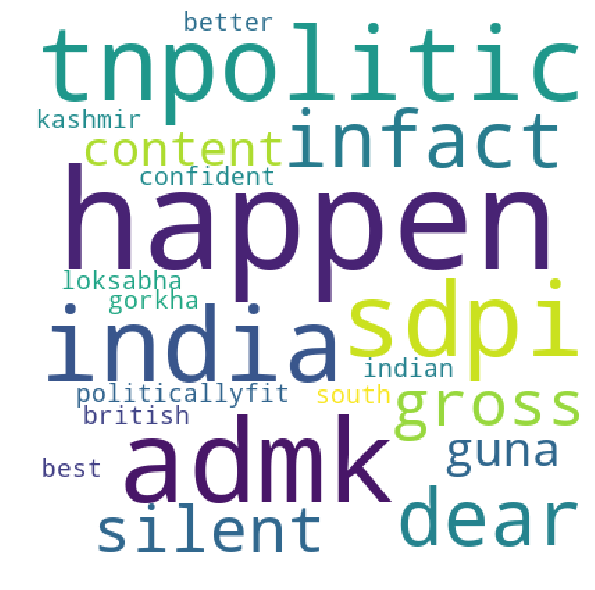

In [66]:
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(' '.join(bjp_adj)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()